<a href="https://colab.research.google.com/github/shivamtyagi577/LearnIt_Machine/blob/main/Linear%20Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **LINEAR REGRESSION | LAB 06 | SHIVAM TYAGI - 2047122**
**What is Linear Regression ?**

Linear Regression is a supervised machine learning algorithm where the predicted output is continuous and has a constant slope. It’s
used to predict values within a continuous range, (e.g. sales, price) rather than trying to classify them into categories (e.g. cat, dog).
There are two main types:

**Simple regression**

Simple linear regression uses traditional slope-intercept form, where [Math Processing Error] and [Math Processing Error] are the
variables our algorithm will try to “learn” to produce the most accurate predictions. [Math Processing Error] represents our input data
and [Math Processing Error] represents our prediction.

**Multivariable regression**

A more complex, multi-variable linear equation might look like this, where [Math Processing Error] represents the coefficients, or
weights, our model will try to learn.
The variables [Math Processing Error] represent the attributes, or distinct pieces of information, we have about each observation. For
sales predictions, these attributes might include a company’s advertising spend on radio, TV, and newspapers.

**Cost function**

The prediction function is nice, but for our purposes we don’t really need it. What we need is a cost function so we can start
optimizing our weights.
Let’s use MSE (L2) as our cost function. MSE measures the average squared difference between an observation’s actual and
predicted values. The output is a single number representing the cost, or score, associated with our current set of weights. Our goal is
to minimize MSE to improve the accuracy of our model.

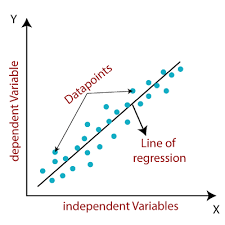

.

# ***Insurance Premium Prediction***


In [ ]:
#Importing essentials libraries and reading .csv file into the Data Frame
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import csv
from google.colab import files
uploaded = files.upload()

Saving Insurance.csv to Insurance.csv


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import r2_score,mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

In [ ]:
import io
DataFrame_1 = pd.read_csv(io.BytesIO(uploaded['Insurance.csv']), header = 1)
DataFrame_1.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [ ]:
DataFrame_1.tail()

,age,sex,bmi,children,smoker,region,charges
1333,50,male,30.97,3,no,northwest,10600.5483
1334,18,female,31.92,0,no,northeast,2205.9808
1335,18,female,36.85,0,no,southeast,1629.8335
1336,21,female,25.80,0,no,southwest,2007.9450
1337,61,female,29.07,0,yes,northwest,29141.3603


In [ ]:
DataFrame_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [ ]:
obj_cols =DataFrame_1.select_dtypes(include=['object'])
obj_cols.columns

Index(['sex', 'smoker', 'region'], dtype='object')

In [ ]:
# Finding unique values for each categorical feature
for i in obj_cols.columns:
    print(i +' feature has ' + str(DataFrame_1[i].nunique()) + ' unique values')

sex feature has 2 unique values
smoker feature has 2 unique values
region feature has 4 unique values


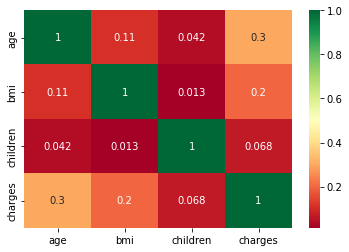

In [ ]:
sns.heatmap(DataFrame_1.corr(),annot=True,cmap='RdYlGn')

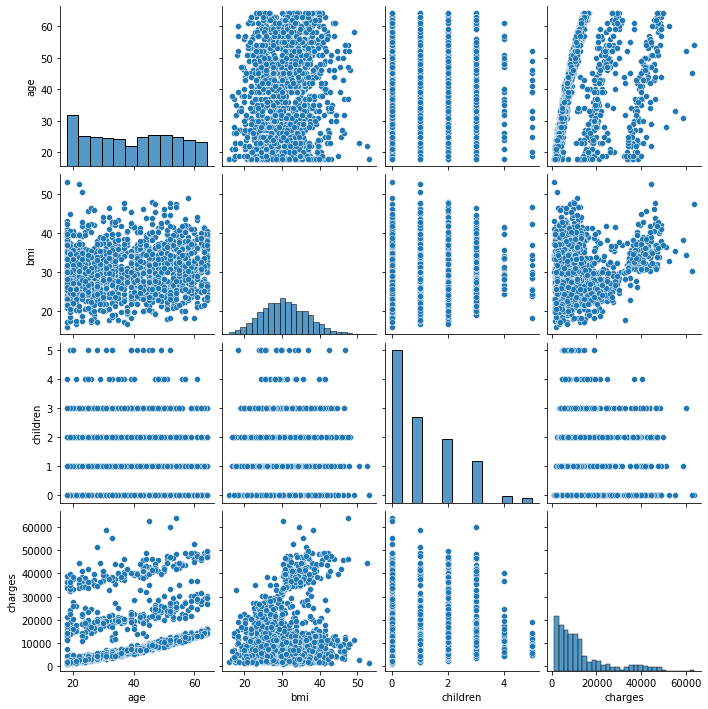

In [ ]:
sns.pairplot(DataFrame_1)

In [ ]:
# We can use get_dummies() of pandas to convert to numerical form
DataFrame_Dummies = pd.get_dummies(DataFrame_1,drop_first=True)   
# here drop_first = True will remove first sub-feature from each feature, because we can derive deleted sub-feature 
# from other sub-features
DataFrame_Dummies.head()

,age,bmi,children,charges,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,0,1,0,0,1
1,18,33.770,1,1725.55230,1,0,0,1,0
2,28,33.000,3,4449.46200,1,0,0,1,0
3,33,22.705,0,21984.47061,1,0,1,0,0
4,32,28.880,0,3866.85520,1,0,1,0,0


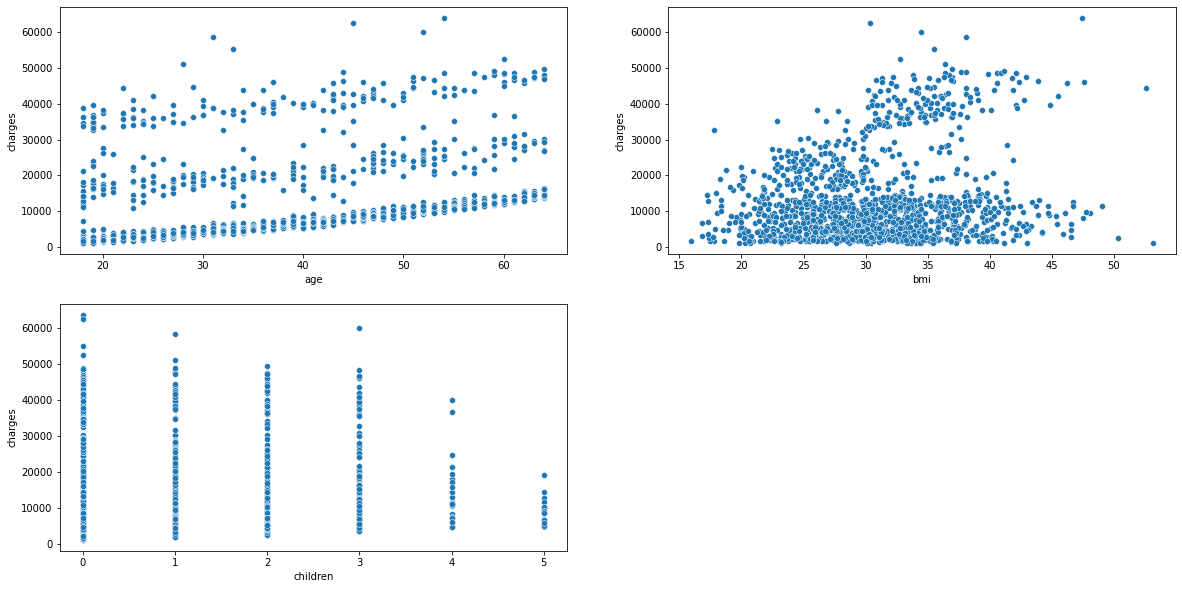

In [ ]:
# Visualizing features

plt.figure(figsize=(20,10))
for i,feat in enumerate(['age','bmi','children']):
    plt.subplot(2,2,i+1)
    sns.scatterplot(x=DataFrame_1[feat],y=DataFrame_1.charges)
plt.show()

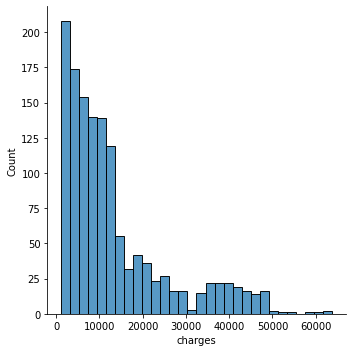

In [ ]:
sns.displot(DataFrame_1['charges'])

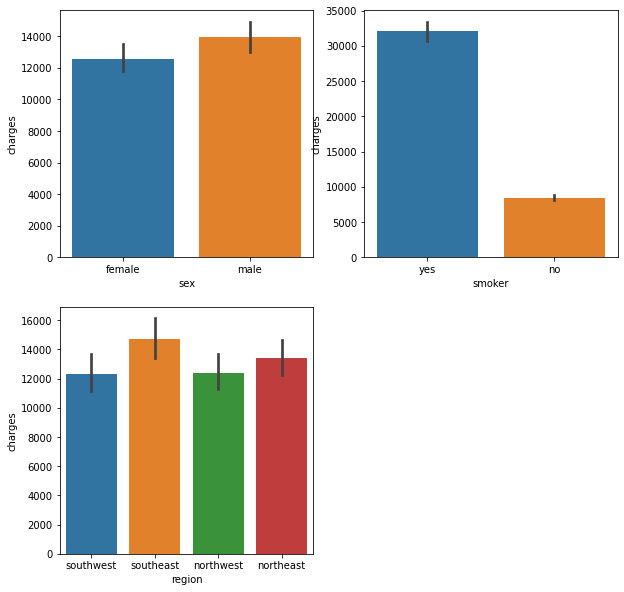

In [ ]:
plt.figure(figsize=(10,10))
for i,feat in enumerate(['sex','smoker','region']):
    plt.subplot(2,2,i+1)
    sns.barplot(x=DataFrame_1[feat],y=DataFrame_1.charges)
plt.show()

**Observations :-**


*   expenses doesnot varies much with respect to 'sex' feature
*   Smoker has to pay more than Non-Smoker
*   expenses doesnot varies much with respect to 'region' feature



In [ ]:
# Arranging dependent and independent variables for Modeling
x = DataFrame_Dummies.drop('charges',axis=1)
Y = DataFrame_Dummies.charges

In [ ]:
# Splitting dataset into train and test sets
xtrain,xtest,Ytrain,Ytest = train_test_split(x,Y,test_size=1/4,random_state=1)

In [ ]:
#Linear Regression
le = LinearRegression()
le_model = le.fit(xtrain,Ytrain)
# predicting values for test data
le_Ypredict = le_model.predict(xtest)
print('MSE of Linear Regression : ' + str(round(mean_squared_error(Ytest,le_Ypredict),2)))
print('r2 score of Linear Regression : ' + str(round(r2_score(Ytest,le_Ypredict),2)))

MSE of Linear Regression : 35791108.69
r2 score of Linear Regression : 0.73


# **Company**

In [ ]:
#Importing essentials libraries and reading .csv file into the Data Frame
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import csv
from google.colab import files
uploaded = files.upload()

Saving companies.csv to companies (1).csv


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import r2_score,mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

In [ ]:
import io
DataFrame_11 = pd.read_csv(io.BytesIO(uploaded['companies.csv']), header = 0)
DataFrame_11.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [ ]:
DataFrame_11.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


In [ ]:
obj_cols =DataFrame_11.select_dtypes(include=['object'])
obj_cols.columns

Index(['State'], dtype='object')

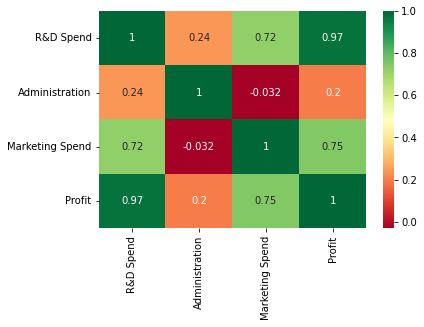

In [ ]:
sns.heatmap(DataFrame_11.corr(),annot=True,cmap='RdYlGn')

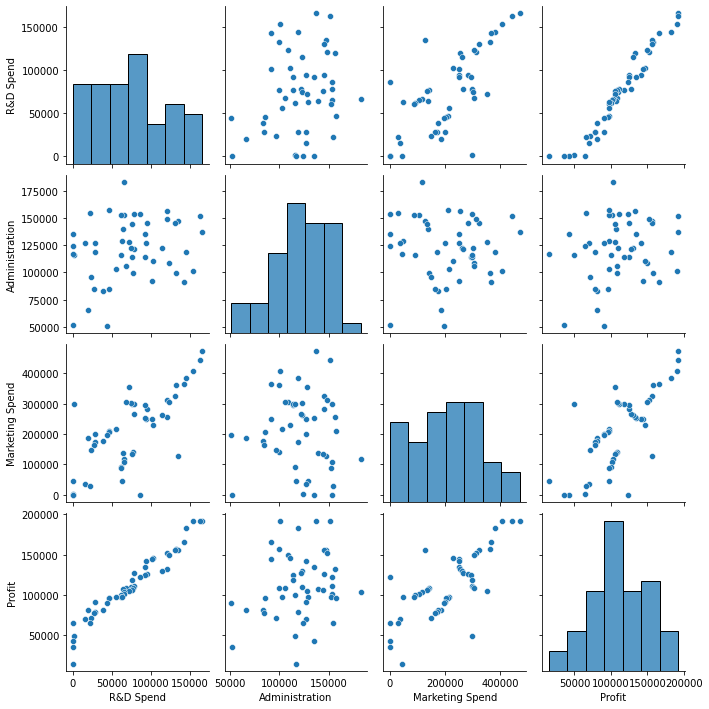

In [ ]:
sns.pairplot(DataFrame_11)

In [ ]:
# We can use get_dummies() of pandas to convert to numerical form
DataFrame__Dummies = pd.get_dummies(DataFrame_11,drop_first=True)   
# here drop_first = True will remove first sub-feature from each feature, because we can derive deleted sub-feature 
# from other sub-features
DataFrame__Dummies.head()

,R&D Spend,Administration,Marketing Spend,Profit,State_Florida,State_New York
0,165349.20,136897.80,471784.10,192261.83,0,1
1,162597.70,151377.59,443898.53,191792.06,0,0
2,153441.51,101145.55,407934.54,191050.39,1,0
3,144372.41,118671.85,383199.62,182901.99,0,1
4,142107.34,91391.77,366168.42,166187.94,1,0


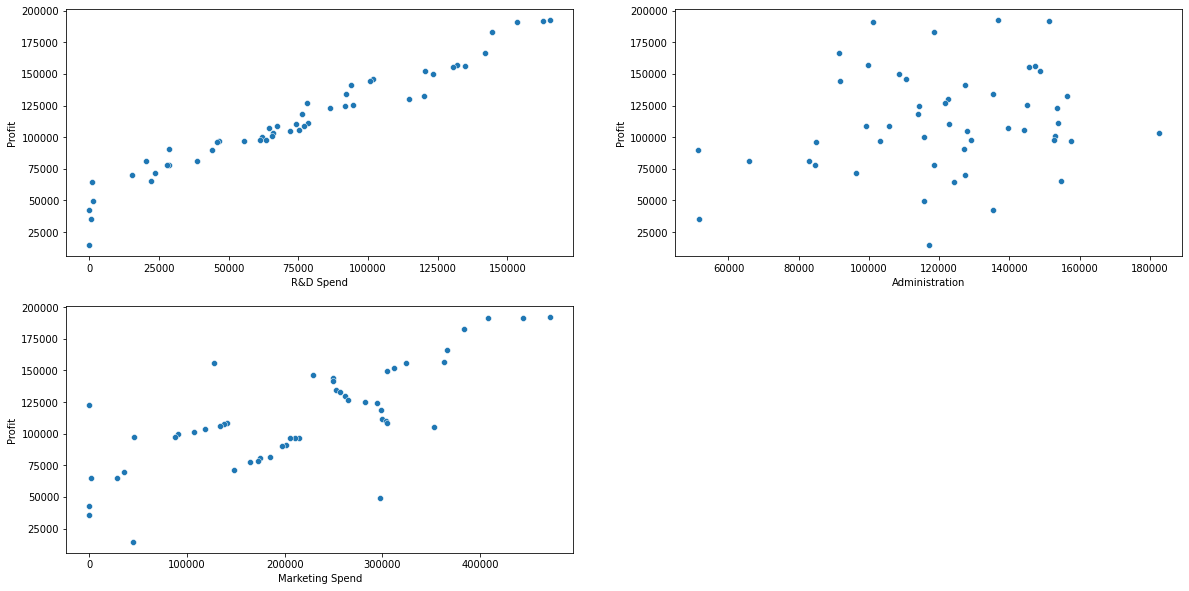

In [ ]:
# Visualizing features

plt.figure(figsize=(20,10))
for i,feat in enumerate(['R&D Spend','Administration','Marketing Spend']):
    plt.subplot(2,2,i+1)
    sns.scatterplot(x=DataFrame_11[feat],y=DataFrame_11.Profit)
plt.show()

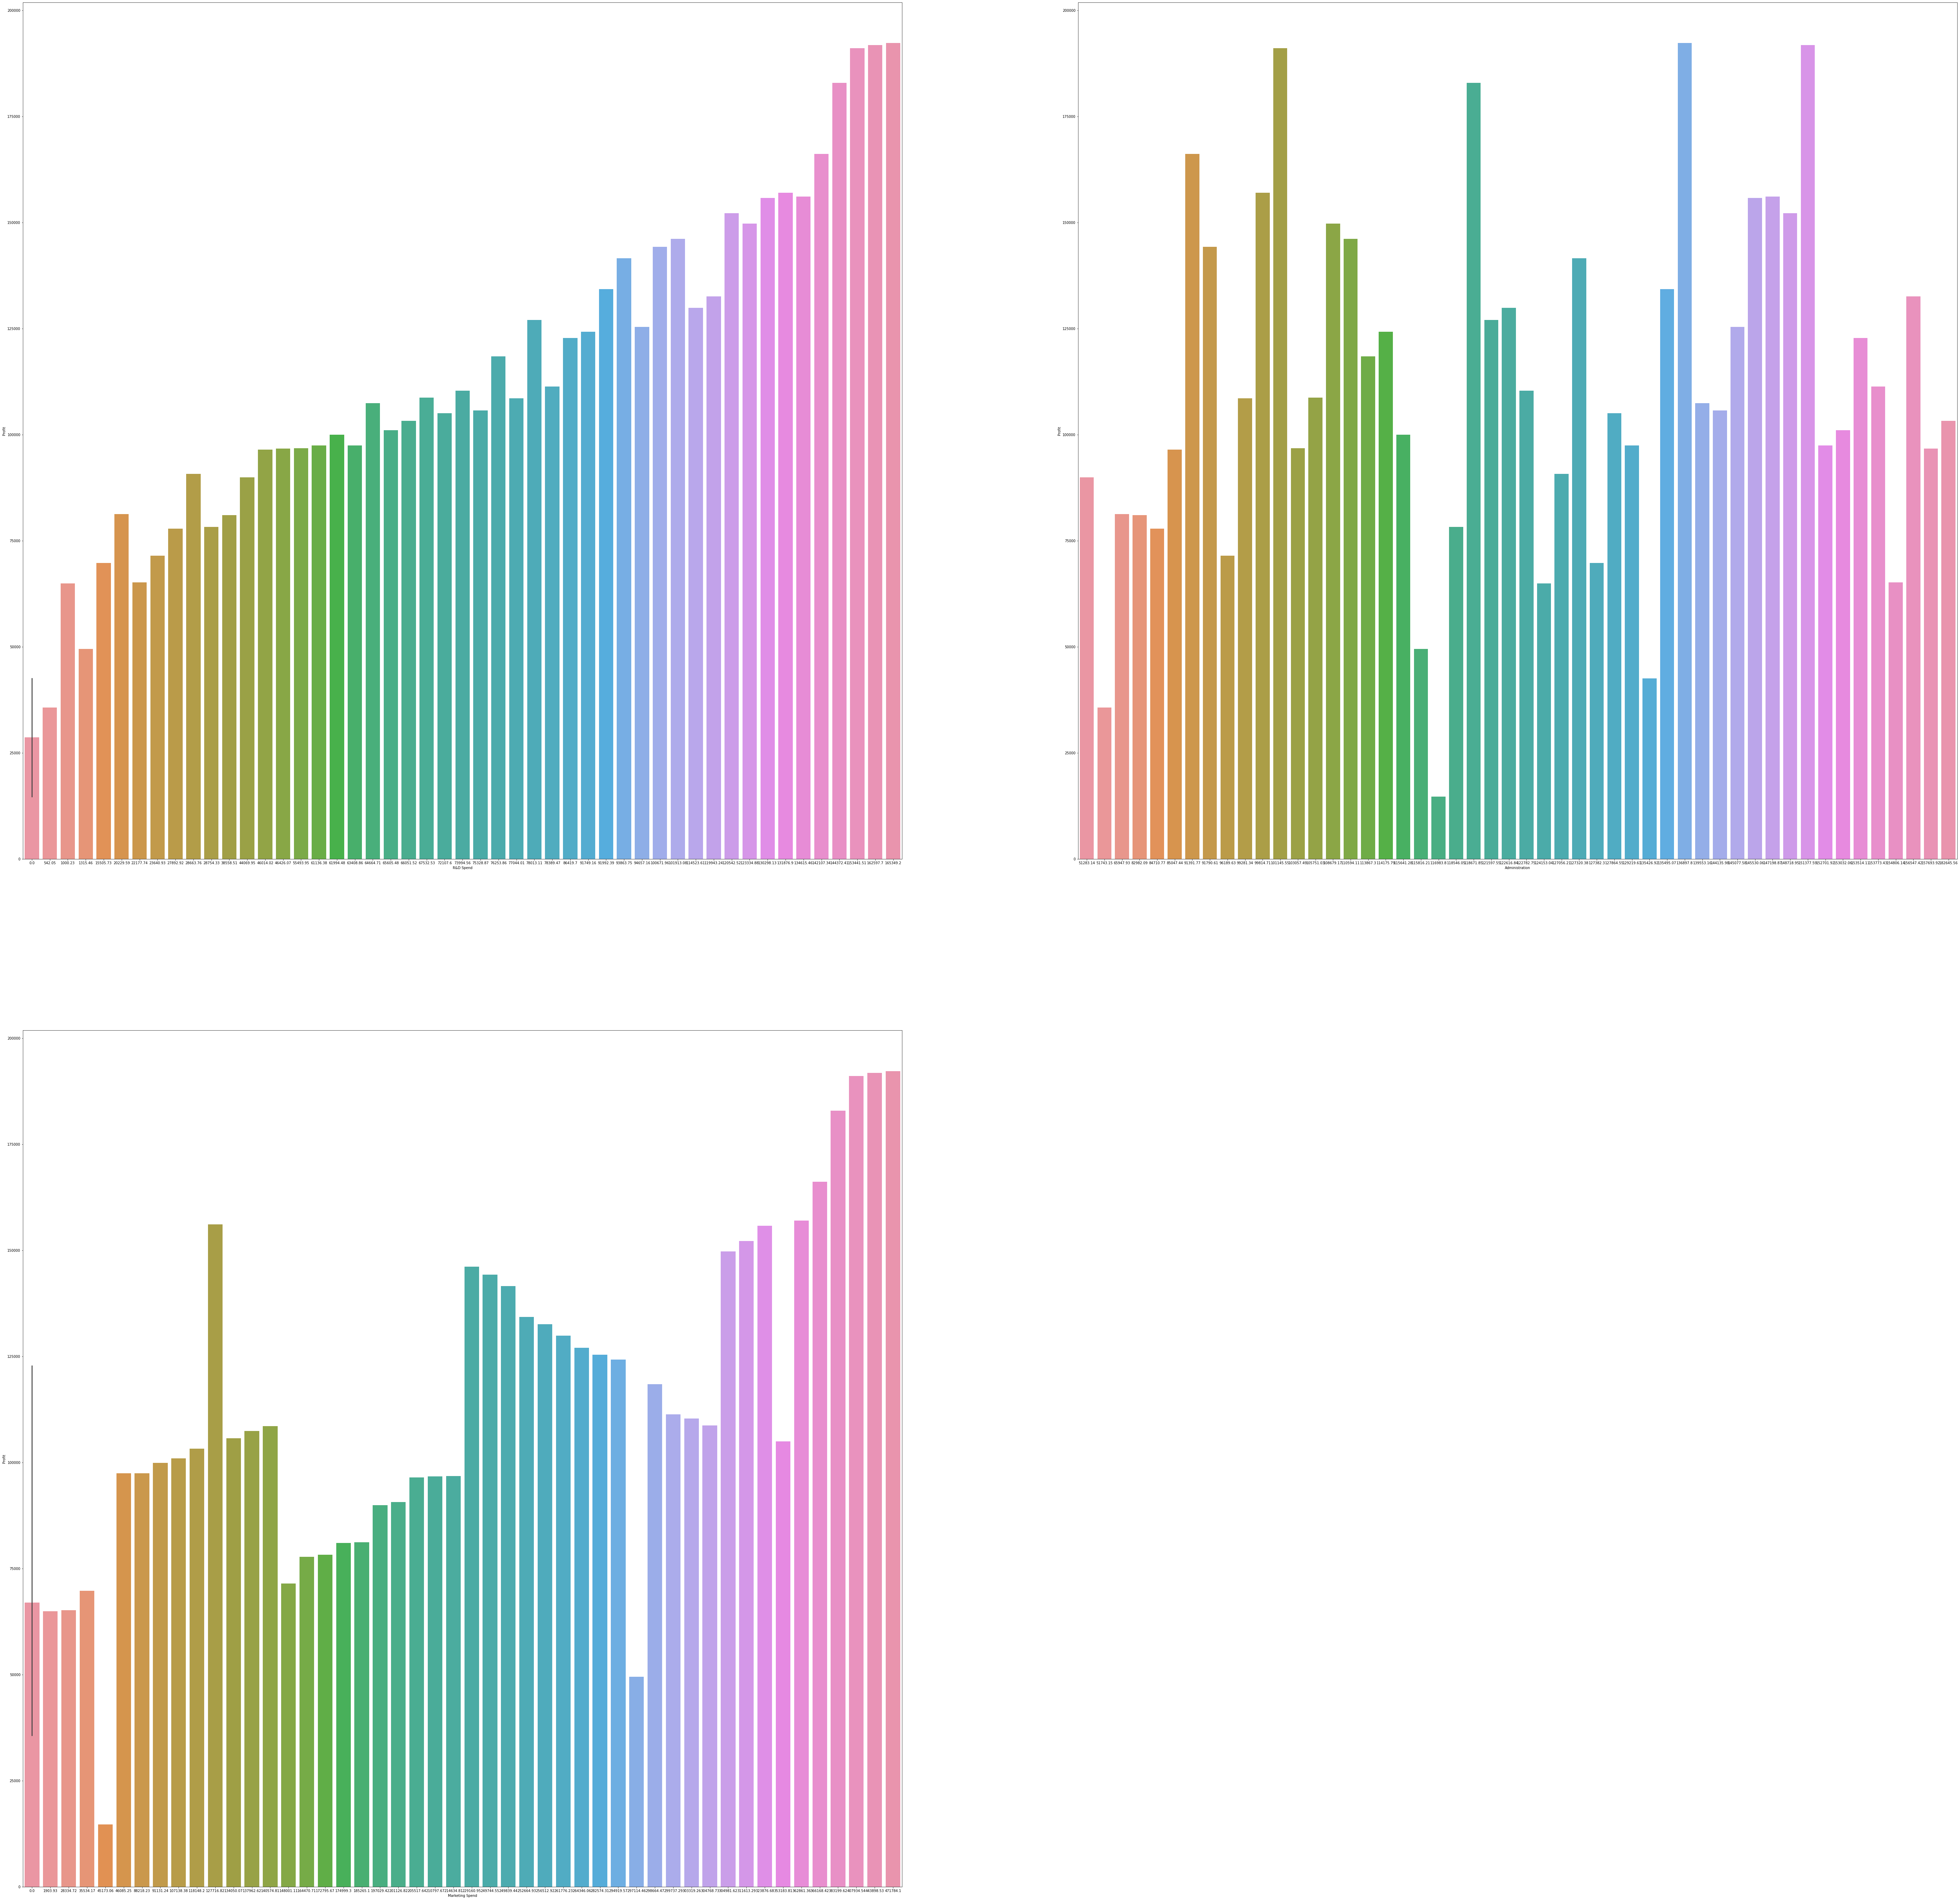

In [ ]:
plt.figure(figsize=(100,100))
for i,feat in enumerate(['R&D Spend','Administration','Marketing Spend']):
    plt.subplot(2,2,i+1)
    sns.barplot(x=DataFrame_11[feat],y=DataFrame_11.Profit)
plt.show()

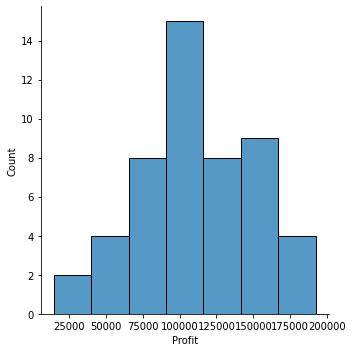

In [ ]:
sns.displot(DataFrame_11['Profit'])

In [ ]:
# Arranging dependent and independent variables for Modeling
x = DataFrame__Dummies.drop('Profit',axis=1)
Y = DataFrame__Dummies.Profit

In [ ]:
# Splitting dataset into train and test sets
xtrain,xtest,Ytrain,Ytest = train_test_split(x,Y,test_size=1/4,random_state=1)

In [ ]:
#Linear Regression
le = LinearRegression()
le_model = le.fit(xtrain,Ytrain)
# predicting values for test data
le_Ypredict = le_model.predict(xtest)
print('MSE of Linear Regression : ' + str(round(mean_squared_error(Ytest,le_Ypredict),2)))
print('r2 score of Linear Regression : ' + str(round(r2_score(Ytest,le_Ypredict),2)))

MSE of Linear Regression : 68771246.8
r2 score of Linear Regression : 0.96
